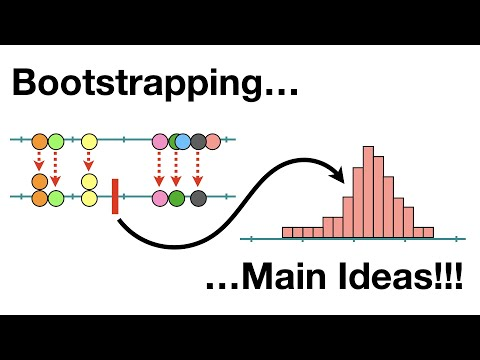

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)


1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

difference：
Standard deviation: Variability within the individual data points.
Standard error of the mean: Variability of the sample mean across different samples.

distinct idea:
Standard deviation is about the variability within the data.
Standard error is about the variability of the mean itself and how confidently we can generalize the sample mean to the population mean.

2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

1.Find the average of sample.
2.Calculate the SEM by dividing the sample's standard deviation by the square root of the sample size.
3.Multiply the SEM by about 2 (1.96 for more accuracy).
4.Subtract this value from the average for the lower limit.
5.Add this value to the average for the upper limit.

3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

Original Sample Mean: 4.51
95% Bootstrapped Confidence Interval: [4.15, 4.85]


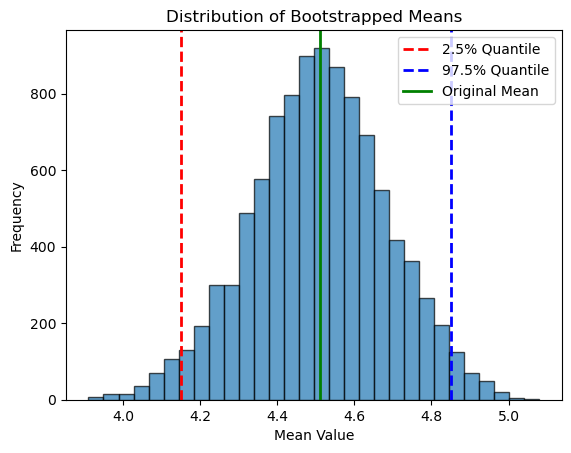

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (original sample)
data = np.array([4.2, 3.8, 5.1, 4.5, 4.9, 4.7, 5.3, 3.6, 4.0, 5.0])

# Parameters
n_bootstrap = 10000  # Number of bootstrap samples
n_original = len(data)  # Size of the original sample

# Step 1: Generate bootstrapped samples and calculate means
bootstrapped_means = []
for _ in range(n_bootstrap):
    # Sample with replacement from the original data
    bootstrap_sample = np.random.choice(data, size=n_original, replace=True)
    bootstrapped_means.append(np.mean(bootstrap_sample))

# Convert to numpy array for easier manipulation
bootstrapped_means = np.array(bootstrapped_means)

# Step 2: Calculate the 95% confidence interval using np.quantile
lower_bound = np.quantile(bootstrapped_means, 0.025)
upper_bound = np.quantile(bootstrapped_means, 0.975)

# Print results
print(f"Original Sample Mean: {np.mean(data):.2f}")
print(f"95% Bootstrapped Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Optional: Visualize the distribution of bootstrapped means
plt.hist(bootstrapped_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='2.5% Quantile')
plt.axvline(upper_bound, color='blue', linestyle='dashed', linewidth=2, label='97.5% Quantile')
plt.axvline(np.mean(data), color='green', linestyle='solid', linewidth=2, label='Original Mean')
plt.title('Distribution of Bootstrapped Means')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Steps to Create a 95% Bootstrapped Confidence Interval

1.Resample the original dataset with replacement to create several new samples, each the same size as the original.
2.For each bootstrapped sample, compute the mean. This results in a distribution of means.
3.Use np.quantile() to find the 2.5th and 97.5th percentiles of the means. These percentiles form the lower and upper limits of your 95% confidence interval.

4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [3]:
import numpy as np

# Example original dataset
data = np.array([5.5, 6.2, 5.8, 6.5, 5.9, 6.1, 5.4, 6.3, 5.7, 6.0])

# Parameters
n_bootstrap = 10000  # Number of bootstrap samples
n_original = len(data)  # Size of the original sample

# Function to calculate IQR
def calculate_iqr(sample):
    return np.percentile(sample, 75) - np.percentile(sample, 25)

# Step 1: Generate bootstrapped samples and calculate means
bootstrapped_means = []
bootstrapped_medians = []
bootstrapped_iqrs = []

for _ in range(n_bootstrap):
    # Sample with replacement from the original data
    bootstrap_sample = np.random.choice(data, size=n_original, replace=True)
    
    # Calculate mean, median, and IQR for each bootstrap sample
    bootstrapped_means.append(np.mean(bootstrap_sample))
    bootstrapped_medians.append(np.median(bootstrap_sample))
    bootstrapped_iqrs.append(calculate_iqr(bootstrap_sample))

# Convert lists to numpy arrays for easier manipulation
bootstrapped_means = np.array(bootstrapped_means)
bootstrapped_medians = np.array(bootstrapped_medians)
bootstrapped_iqrs = np.array(bootstrapped_iqrs)

# Step 2: Calculate the 95% confidence intervals using np.quantile

# Confidence interval for the mean
lower_bound_mean = np.quantile(bootstrapped_means, 0.025)
upper_bound_mean = np.quantile(bootstrapped_means, 0.975)

# Confidence interval for the median
lower_bound_median = np.quantile(bootstrapped_medians, 0.025)
upper_bound_median = np.quantile(bootstrapped_medians, 0.975)

# Confidence interval for the IQR
lower_bound_iqr = np.quantile(bootstrapped_iqrs, 0.025)
upper_bound_iqr = np.quantile(bootstrapped_iqrs, 0.975)

# Step 3: Print results
print(f"Original Sample Mean: {np.mean(data):.2f}")
print(f"95% Bootstrapped Confidence Interval for Mean: [{lower_bound_mean:.2f}, {upper_bound_mean:.2f}]")

print(f"Original Sample Median: {np.median(data):.2f}")
print(f"95% Bootstrapped Confidence Interval for Median: [{lower_bound_median:.2f}, {upper_bound_median:.2f}]")

print(f"95% Bootstrapped Confidence Interval for IQR: [{lower_bound_iqr:.2f}, {upper_bound_iqr:.2f}]")


Original Sample Mean: 5.94
95% Bootstrapped Confidence Interval for Mean: [5.74, 6.14]
Original Sample Median: 5.95
95% Bootstrapped Confidence Interval for Median: [5.65, 6.20]
95% Bootstrapped Confidence Interval for IQR: [0.17, 0.78]


Explanation of the Combined Code
Data Initialization:
The original dataset is defined as a NumPy array. You can replace this with your actual dataset.
Parameters:
n_bootstrap: The number of bootstrap samples to generate.
n_original: The size of the original sample, which is used when creating each bootstrapped sample.
IQR Calculation Function:
A function calculate_iqr(sample) computes the interquartile range (IQR) by subtracting the 25th percentile from the 75th percentile.
Bootstrap Sampling:
A loop generates n_bootstrap bootstrapped samples. In each iteration, a sample is drawn with replacement from the original data.
The mean, median, and IQR for each bootstrap sample are calculated and stored in their respective lists.
Convert Lists to Numpy Arrays:
After the loop, the lists of bootstrapped means, medians, and IQRs are converted to NumPy arrays for easier manipulation and analysis.
Confidence Interval Calculation:
The lower and upper bounds of the 95% confidence intervals for the mean, median, and IQR are calculated using the np.quantile() function.
Print Results:
The code outputs the original sample mean and median, along with their corresponding 95% bootstrap confidence intervals, and also prints the confidence interval for the IQR.





Summary
This combined code allows you to compute bootstrap confidence intervals for multiple statistics, including the mean, median, and interquartile range, in a structured way. You can easily modify the dataset or add additional statistics by following the same approach demonstrated in the code.




link:https://chatgpt.com/share/66fb57f1-4f4c-8006-88cd-8f0788b0c82b


5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

Distinguishing between the population parameter and the sample statistic is important because the population parameter is the true value we want to know, while the sample statistic is our estimate from a smaller group. Since sample statistics can vary, there's uncertainty in our estimates, and confidence intervals help show this uncertainty by providing a range for where the true population parameter might lie. Understanding this difference allows us to make better estimates and interpret our results accurately.

6.Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

1.What is the process of bootstrapping?
2.What is the main purpose of bootstrapping?
3.If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

1.Randomly select data points from the original sample with replacement to create many new bootstrap samples, each of size n (same size as the original sample). This allows repeated selection of the same data points.
For each bootstrap sample, calculate the statistic of interest (e.g., mean, median, etc.).
Repeat the process of creating bootstrap samples and calculating the statistic many times (e.g., 1,000 or 10,000 times) to build a distribution of the statistic.7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.
Use the distribution of the calculated statistics to estimate variability and create confidence intervals. This gives insight into the uncertainty of the statistic based on the sample.

2.The main purpose of bootstrapping is to measure how uncertain my statistic (like an average) is. Instead of just saying, “The average is this,” bootstrapping lets me create a range (a confidence interval) that shows where the true average likely is.

3.To check if my guessed average is reasonable using bootstrapping, I would start by making lots of new samples from my original data, picking data points randomly with replacement. For each new sample, I’d calculate the average, doing this many times to get a range of averages. Then, I’d see if my guessed average falls within the range where most of these bootstrap averages lie (the 95% confidence interval). If it does, my guess is likely reasonable. If not, it might be off.

7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

A confidence interval that overlaps zero "fails to reject the null hypothesis" because it suggests that the true population mean could plausibly be zero. The null hypothesis typically states that there is no effect (the mean is zero). Even if the observed sample mean is not zero, the confidence interval reflects the variability and uncertainty in the sample data. If zero is within this interval, it means we cannot confidently say the true mean is different from zero, so we fail to reject the null hypothesis.

Conversely, if the confidence interval does not overlap zero, it indicates that zero is not a plausible value for the population mean. In this case, we have enough evidence to reject the null hypothesis, suggesting that the drug does have a significant effect on average. Thus, the absence of zero in the confidence interval leads to a stronger conclusion that the observed effect is likely real and not due to random sampling variability.

8. Complete the following assignment.

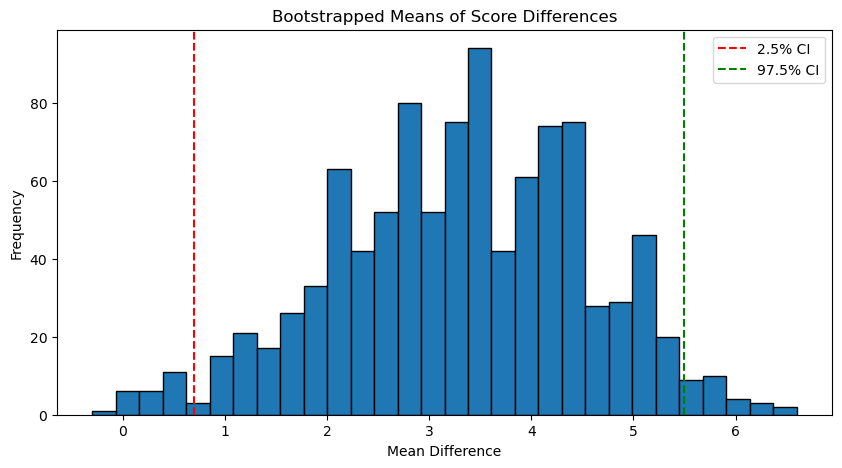

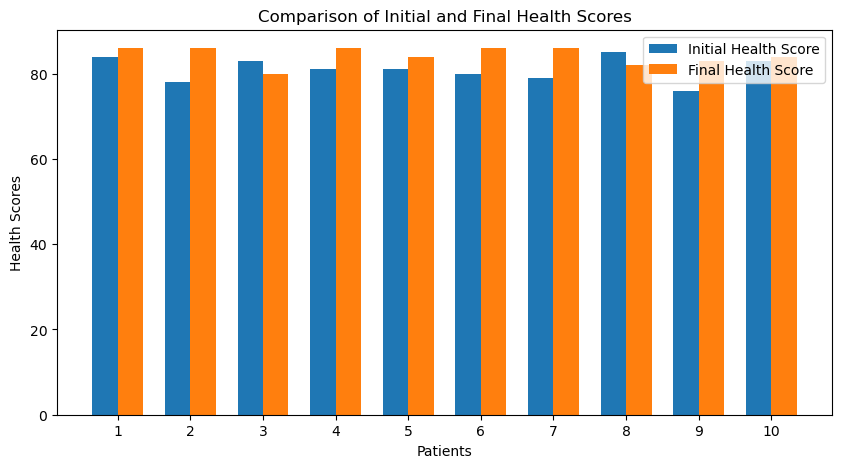

95% Confidence Interval for the Mean Difference: (0.70, 5.50)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Data
# Create a DataFrame directly for demonstration purposes; in practice, this would come from a CSV.
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Step 2: Calculate the Differences
data['ScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Step 3: Bootstrapping Analysis
np.random.seed(42)  # For reproducibility
n_iterations = 1000
boot_means = []

for _ in range(n_iterations):
    sample = np.random.choice(data['ScoreDifference'], size=len(data), replace=True)
    boot_means.append(np.mean(sample))

# Calculate the confidence interval
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)

# Step 4: Visualize the Bootstrapped Means
plt.figure(figsize=(10, 5))
plt.hist(boot_means, bins=30, edgecolor='k')
plt.axvline(x=lower_bound, color='red', linestyle='--', label='2.5% CI')
plt.axvline(x=upper_bound, color='green', linestyle='--', label='97.5% CI')
plt.title('Bootstrapped Means of Score Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 5: Bar Plot for Initial and Final Health Scores
bar_width = 0.35
index = np.arange(len(data))

plt.figure(figsize=(10, 5))
plt.bar(index, data['InitialHealthScore'], bar_width, label='Initial Health Score')
plt.bar(index + bar_width, data['FinalHealthScore'], bar_width, label='Final Health Score')

plt.xlabel('Patients')
plt.ylabel('Health Scores')
plt.title('Comparison of Initial and Final Health Scores')
plt.xticks(index + bar_width / 2, data['PatientID'])
plt.legend()
plt.show()

# Print the confidence interval results
print(f'95% Confidence Interval for the Mean Difference: ({lower_bound:.2f}, {upper_bound:.2f})')


Quantitative Analysis

We will perform a bootstrapping analysis to estimate the confidence interval for the mean difference in health scores. This will help us assess the uncertainty around our estimate of the vaccine's effect. The bootstrapped means will be calculated from the difference between final and initial health scores.

Based on our analysis, we will conclude whether or not we can reject the null hypothesis of "no effect." If the confidence interval excludes zero, we will state that there is statistically significant evidence that the vaccine improves health scores.

By following this structured approach, you will provide a comprehensive analysis of the vaccine's effectiveness, supported by visualizations and statistical evidence. Be sure to document your code and explanations clearly to enhance the clarity of your report.

9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes